In [71]:
import torch
# 이미지데이터를 사용하기 위해서 기존 데이터 사용, 변형
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F


In [72]:
use_cuda=torch.cuda.is_available()
print(use_cuda)
device=torch.device('cuda' if use_cuda else 'cpu')
print(device)
# 랜덤함수 시드 고정=같은 랜덤발생
random.seed(777)
# torch.maual_seed(777) 같음
if device=='cuda':
 torch.cuda.manual_seed(777)

False
cpu


In [73]:
# 사용하려는 데이터가 6만개 정도라 절단
epochs=15
batch_size=100


In [74]:
mnist_train=dataset.MNIST(root="data/MNIST_data", #데이터 저장위치
                          train=True, #train data로 지정
                          transform=transforms.ToTensor(), #array -> toTensor로 변환
                          download=True
                          )
mnist_test=dataset.MNIST(root="data/MNIST_data", #데이터 저장위치
                          train=False, #train data로 지정
                          transform=transforms.ToTensor(), #array -> toTensor로 변환
                          download=True
                          )

In [96]:
import numpy as np
def plot(x,y):
  plt.figure(figsize=(8,10))
  for i in range(len(x)):
    plt.subplot(5,5, i+1) 
    plt.title(y[i].item()) 
    img=np.array(x[i]).reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  plt.show()


c:\Users\it\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1])


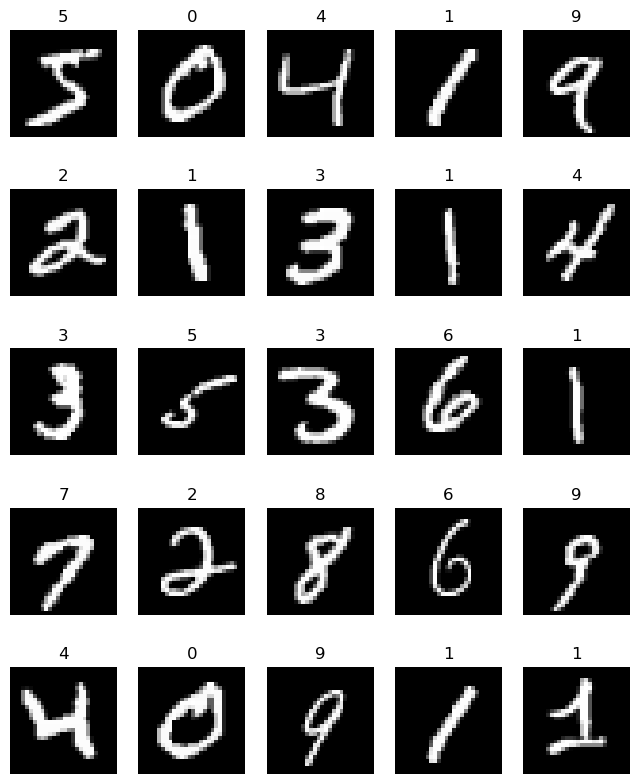

In [97]:
print(mnist_train.train_labels[:25])
plot(mnist_train.data[:25],mnist_train.train_labels[:25])

In [ ]:
data_loader = DataLoader(dataset=mnist_train, #로드할 데이터셋 
                          batch_size=batch_size, #한번에 업로드할 데이터셋의 size
                          shuffle=True,
                          drop_last=True)

In [ ]:
for X, Y in data_loader:
 print(X.size(),Y.size())
 break

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [ ]:
model=nn.Sequential(
  nn.Linear(784, 500, bias=True),
  nn.LeakyReLU(),
   nn.Linear(500,400, bias=True),
  nn.LeakyReLU(),
   nn.Linear(400,300, bias=True),
  nn.LeakyReLU(),
   nn.Linear(300,200, bias=True),
  nn.LeakyReLU(),
   nn.Linear(200,100, bias=True),
  nn.LeakyReLU(),
   nn.Linear(100,10, bias=True),
  nn.LogSoftmax(dim=-1) #마지막은 소프트맥스로 출력

)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=10, bias=True)
  (11): LogSoftmax(dim=-1)
)


In [ ]:
# 손실함수
crit=nn.CrossEntropyLoss()
# crit=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)


In [ ]:
for epoch in range(epochs): # X,Y 데이터 100개씩
   
   avg_cost = 0
   
   for X,Y in data_loader:
      X = X.view(-1, 28*28) # 2차원으로 형태 변형. 원래 차원: 1차원. [100,1,28,28]
      y_hat = model(X)
      cost = crit(y_hat, Y)

      optimizer.zero_grad()
      cost.backward()
      optimizer.step()
      avg_cost += cost.item()
   avg_cost = avg_cost/100
   print('epoch:{}, cost:{}'.format(epoch, avg_cost))

epoch:0, cost:10.386305585205555
epoch:1, cost:1.715243812687695
epoch:2, cost:0.811383112911135
epoch:3, cost:0.575548426611349
epoch:4, cost:0.4012929488485679
epoch:5, cost:0.32168170309974814
epoch:6, cost:0.2413928870181553
epoch:7, cost:0.18599021124769932
epoch:8, cost:0.13775125541724265
epoch:9, cost:0.12430272569996305
epoch:10, cost:0.10096114266227232
epoch:11, cost:0.07137936843762872
epoch:12, cost:0.05560163861853653
epoch:13, cost:0.06289855399780209
epoch:14, cost:0.03258848033383401


In [100]:
with torch.no_grad():
  x_test=mnist_test.test_data.view(-1,28*28).float() #[10000, 1, 28, 28]
  y_test=mnist_test.test_labels
  pred=model(x_test).argmax(dim=1)
  accuracy = (pred == y_test).sum()/len(pred)
  print(accuracy)
  print(pred[:5])
  print(y_test[:5])

tensor(0.9755)
tensor([7, 2, 1, 0, 4])
tensor([7, 2, 1, 0, 4])


In [102]:
import pandas as pd 
from sklearn.metrics import confusion_matrix

In [108]:
df=pd.DataFrame(confusion_matrix(y_test,pred),
                index=['true %d'%i for i in range(10)],
                columns=['pred %d'%i for i in range(10)])
df

,pred 0,pred 1,pred 2,pred 3,pred 4,pred 5,pred 6,pred 7,pred 8,pred 9
true 0,972,0,2,0,0,0,3,1,1,1
true 1,0,1125,4,0,0,0,2,2,2,0
true 2,4,1,1014,2,4,0,2,4,1,0
true 3,1,0,4,995,0,4,0,3,2,1
true 4,1,0,2,0,957,0,4,5,0,13
true 5,4,0,0,10,0,867,5,1,2,3
true 6,8,3,0,1,4,4,938,0,0,0
true 7,1,3,8,2,0,1,0,1010,1,2
true 8,2,1,12,19,1,4,3,2,926,4
true 9,2,5,0,10,11,1,0,29,0,951
